In [4]:
import pandas as pd

#Load the dataset (movie assignment data & data dictionary)
csv_file_path = 'Movie Assignment Data.csv'
movies_df = pd.read_csv(csv_file_path)

excel_file_path = 'Movie Assignment Data Dictionary.xlsx'
data_dictionary_df = pd.read_excel(excel_file_path)

#Verify that it has loaded correctly by displaying the first few rows
print(movies_df.head())
print(data_dictionary_df.head())



                   Title  title_year     budget      Gross      actor_1_name  \
0             La La Land        2016   30000000  151101803      Ryan Gosling   
1               Zootopia        2016  150000000  341268248  Ginnifer Goodwin   
2                   Lion        2016   12000000   51738905         Dev Patel   
3                Arrival        2016   47000000  100546139         Amy Adams   
4  Manchester by the Sea        2016    9000000   47695371     Casey Affleck   

         actor_2_name     actor_3_name  actor_1_facebook_likes  \
0          Emma Stone       Amiée Conn                   14000   
1       Jason Bateman       Idris Elba                    2800   
2       Nicole Kidman      Rooney Mara                   33000   
3       Jeremy Renner  Forest Whitaker                   35000   
4  Michelle Williams     Kyle Chandler                     518   

   actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes3044M Votes3044F  \
0                 19000.0                

In [5]:
# Generate descriptive statistics for the budget
budget_stats = movies_df['budget'].describe()
print(budget_stats)

count    1.000000e+02
mean     7.838400e+07
std      7.445295e+07
min      3.000000e+06
25%      1.575000e+07
50%      4.225000e+07
75%      1.500000e+08
max      2.600000e+08
Name: budget, dtype: float64


In [7]:
# Print all column names
print(movies_df.columns)


Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')


In [8]:
# Filter the DataFrame for movies with a PG-13 rating and produced in the Unites States
pg13_us_movies = movies_df[(movies_df['Country'] == 'USA') & (movies_df['content_rating'] == 'PG-13')]

#Get the number of such movies
number_of_pg13_us_movies = pg13_us_movies.shape[0]
print(f'Number of top-rated movies produced in the United States with a PG-13 rating: {number_of_pg13_us_movies}')

Number of top-rated movies produced in the United States with a PG-13 rating: 35


In [5]:
import pandas as pd

# Assuming the CSV file is in the same directory as notebook
# Otherwise, provide the correct path to the CSV file
dataset_path = 'Movie Assignment Data.csv'
movies_df = pd.read_csv(dataset_path)

In [6]:
# Filter the DataFrae for movies produced in 2014 but not in the USA
non_us_2014_movies = movies_df[(movies_df['title_year'] == 2014) & (movies_df['Country'] != 'USA')]

# Check if there are any such movies
any_non_us_2014_movies = non_us_2014_movies.shape[0] > 0
print(f'Were there any top-rated movies from 2014 not produced in the USA? {"Yes" if any_non_us_2014_movies else "No"}')


# If there are such movies, display them
if any_non_us_2014_movies:
    print(non_us_2014_movies[['Title', 'Country']])   

Were there any top-rated movies from 2014 not produced in the USA? Yes
                       Title    Country
45            The Lego Movie  Australia
78  The Theory of Everything         UK
80                Ex Machina         UK
81        The Imitation Game         UK


In [8]:
# Determin ehte genres listed for each movie
movies_df['genre_count'] = movies_df[['genre_1', 'genre_2', 'genre_3']].notnull().sum(axis=1)

# Calculate the total number of movies
total_movies = movies_df.shape[0]

# Calculate the number and percentage of movies for each genre count
genre_counts = movies_df['genre_count'].value_counts().sort_index()
for genre_count in range(1, 4):
    count = genre_counts.get(genre_count, 0)
    percentage = (count / total_movies) * 100
    print(f"Percenatge of movies with {genre_count} genre(s): {percentage:.2f}%")

Percenatge of movies with 1 genre(s): 3.00%
Percenatge of movies with 2 genre(s): 23.00%
Percenatge of movies with 3 genre(s): 74.00%


In [9]:
# Convert 'budget' and 'Gross' from dollars to millions and round to 3 decimal places
movies_df['budget_millions'] = movies_df['budget'].apply(lambda x: round(x / 1e6, 3))
movies_df['Gross_millions'] = movies_df['Gross'].apply(lambda x: round(x / 1e6, 3))

# Display the first few rounds to confirm the conversion
print(movies_df[['Title', 'budget_millions', 'Gross_millions']].head())

                   Title  budget_millions  Gross_millions
0             La La Land             30.0         151.102
1               Zootopia            150.0         341.268
2                   Lion             12.0          51.739
3                Arrival             47.0         100.546
4  Manchester by the Sea              9.0          47.695


In [10]:
#Calculate the profit each movie
movies_df['profit'] = movies_df['Gross'] - movies_df['budget']

# Convert 'profit' from dollars to millions and round to 3 decimal places
movies_df['profit_millions'] = movies_df['profit'].apply(lambda x: round(x / 1e6, 3))

# Sort movies by profit in descending prder and take the top 10
top_profit_movies = movies_df.sort_values(by='profit', ascending=False).head(10)

# Selecting the details to display the top 10 most profitable movies
columns_to_display = ['Title', 'budget_millions', 'Gross_millions', 'profit_millions']
top_10_profitable_movies = top_profit_movies[columns_to_display]

print(top_10_profitable_movies)

                                         Title  budget_millions  \
97  Star Wars: Episode VII - The Force Awakens            245.0   
11                                The Avengers            220.0   
47                                    Deadpool             58.0   
32             The Hunger Games: Catching Fire            130.0   
12                                 Toy Story 3            200.0   
8                        The Dark Knight Rises            250.0   
45                              The Lego Movie             60.0   
1                                     Zootopia            150.0   
41                               Despicable Me             69.0   
18                                  Inside Out            175.0   

    Gross_millions  profit_millions  
97         936.662          691.662  
11         623.280          403.280  
47         363.024          305.024  
32         424.646          294.646  
12         414.984          214.984  
8          448.131          198.13

In [13]:
# Combine all actor name columns into a single series and drop duplicates
actors = pd.Series(movies_df['actor_1_name'].tolist() + movies_df['actor_2_name'].tolist() + movies_df['actor_3_name'].tolist()).unique()

# Convert to a lisy, sort it, and then create a DataFrame for better readability
sorted_actors = sorted(actors)
actors_df = pd.DataFrame(sorted_actors, columns=['Actor Names'])

# Display the sorted actor names
print(actors_df)

         Actor Names
0                  0
1    Abraham Benrubi
2         Adam Brown
3        Aidan Quinn
4       Aidan Turner
..               ...
230     Tyler Labine
231       Vin Diesel
232     Will Ferrell
233       Will Forte
234     ZoÃ« Kravitz

[235 rows x 1 columns]


In [15]:
# Concatenate all actor columns into a single Series
all_actors = pd.concat([movies_df['actor_1_name'], movies_df['actor_2_name'], movies_df['actor_3_name']])

# Count te number of appearances of each actor and sort them in descending order
actor_counts = all_actors.value_counts()

# Get the top 3 actors
top_3_actors = actor_counts.head(3)

# Display the top 3 actor and the number of top-rated movies they appeared in 
print(top_3_actors)

Tom Hardy            5
Leonardo DiCaprio    5
Jennifer Lawrence    4
dtype: int64


In [27]:
country_movie_counts = movies_df['Country'].value_counts()

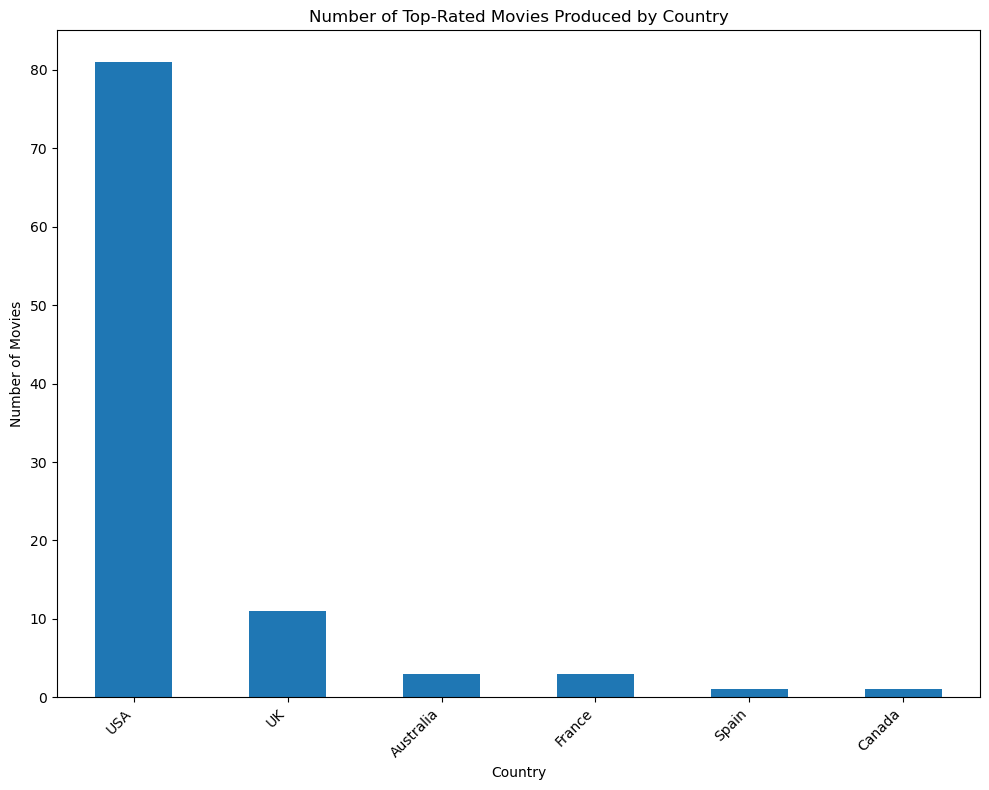

In [28]:
import matplotlib.pyplot as plt

# Now we plot the bar chart
plt.figure(figsize=(10, 8))
country_movie_counts.plot(kind='bar')
plt.title('Number of Top-Rated Movies Produced by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to fit the figure nicely
plt.show()


In [31]:
print(movies_df.columns)


Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'genre_count',
       'budget_millions', 'Gross_millions', 'profit

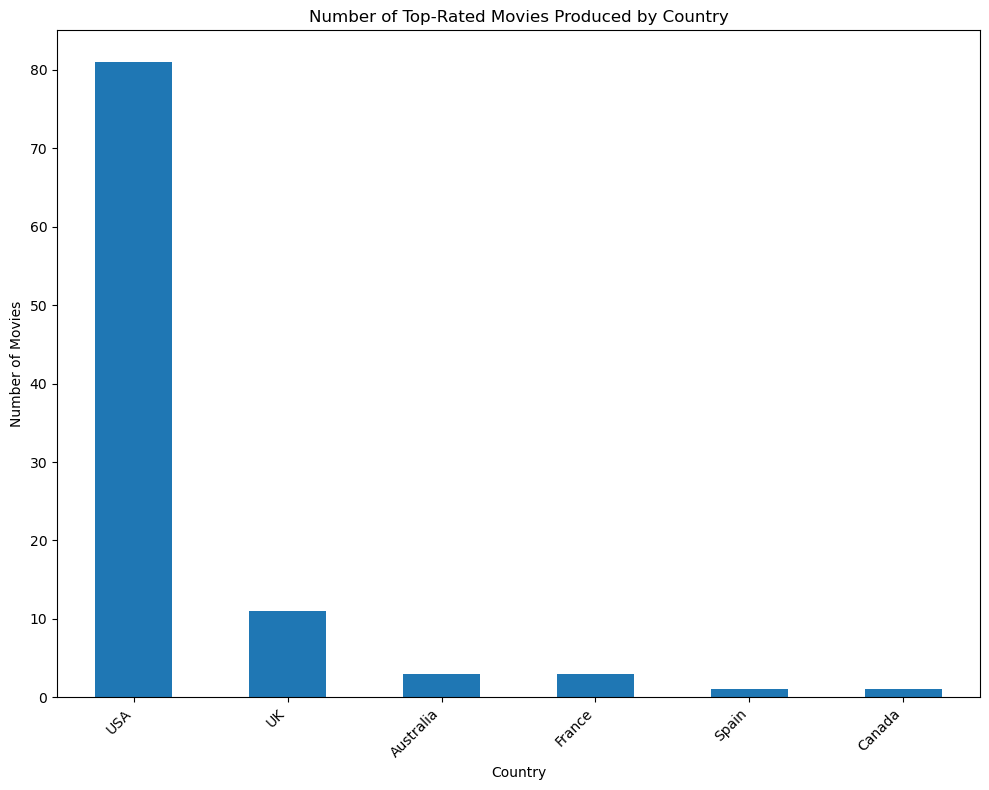

In [32]:
# This should be run in one cell
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset here if movies_df is not already defined
# dataset_path = 'path_to_your_csv.csv'  # Use the correct path to your CSV
# movies_df = pd.read_csv(dataset_path)

# Ensure this variable is defined in the same cell before plotting
country_movie_counts = movies_df['Country'].value_counts()

# Then, in the next cell, run your plotting code
plt.figure(figsize=(10, 8))
country_movie_counts.plot(kind='bar')
plt.title('Number of Top-Rated Movies Produced by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
